# Fortune 100

For my data exploration project, I decided to get the companies in the <a href="https://fortune.com/fortune500/">2019 Fortune 100 list</a> and <a href="https://fortune.com/global500/">Global 100 list</a>.

Unfortunely, I couldn't scrape the website using BeautifulSoup because the list buffers and expands without changing the url (i.e. the HTML that I get is incomplete). But I found a different package that works called **Selenium**. Selenium allows me to add wait time while the page buffers, and I can click the pages using code. Most of the guidance was taken from <a href='https://nycdatascience.com/blog/student-works/visualizing-fortune-500-cos/'>this blog</a>.



The data I want to visualize include:
* Sector
* Industry
* Country/State of HQ
* Year founded
* Years on Fortune 500 list (easier than getting Fortune 100 for past years)
* Revenue
* Revnue change
* Profits
* Profit Change
* Number of employees

## Web scraping

In [2]:
# Import libraries
import pandas as pd
import numpy as np

import csv

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [19]:
# Create csv file with headings (matching the table on website)
csv_file = open('fortune.csv', 'w', encoding='utf-8', newline='')
writer = csv.writer(csv_file)
writer.writerow(['rank',
                 'company',
                 'revenues',
                 'revenue_pct_change', 
                 'profits',
                 'profits_pct_change',
                 'assets',
                 'market_val',
                 'rank_change_1000',
                 'employees',
                 'rank_change_500',
                 'url'
                ]);

# Open browser
driver = webdriver.Chrome('/Users/sarinachen/Desktop/Visual-Sandbox/Fortune 100/data/chromedriver')
url = 'https://fortune.com/fortune500/2019/search/'
driver.get(url)

# Add buffer time for the page to load
time.sleep(8)

# Page index used to keep track of where we are.
page = 1
while page <= 100:
    
    print("Scraping Page number " + str(page))

    try: 

        # Find all the rows on the page
        # Wait 10 seconds before thowing an exception
        # Calls ExpectedCondition every 500 milliseconds until returns successfully
        rows = WebDriverWait(driver, 10) \
                    .until(EC.presence_of_all_elements_located((By.CLASS_NAME, 'rt-tr-group')))

        for row in rows:

            # Initialize an empty dictionary for each review
            row_dict = {}

            # Get Rank
            try:
                rank = row.find_element_by_xpath('.//div[@class="rt-td searchResults__cell--2Y7Ce searchResults__rank--1sTfo"]//span').text
                row_dict['rank'] = rank
            except:
                row_dict['rank'] = None

            # Get Company
            try:
                company = row.find_element_by_xpath('.//div[@class="rt-td searchResults__cell--2Y7Ce searchResults__title--3LyRA"]//span/div').text
                row_dict['company'] = company
            except:
                row_dict['company'] = None

            # Get other values (in the same group)
            try:
                other_vals = row.find_elements_by_xpath('.//div[@class="rt-td searchResults__cell--2Y7Ce"]//span')
                other_vals = [val.text for val in other_vals]  
                row_dict['revenues'] = other_vals[0]
                row_dict['revenue_pct_change'] = other_vals[1]
                row_dict['profits'] = other_vals[2]
                row_dict['profits_pct_change'] = other_vals[3]
                row_dict['assets']= other_vals[4]
                row_dict['market_val'] = other_vals[5]
                row_dict['rank_change_1000'] = other_vals[6]
                row_dict['employees'] = other_vals[7]
                row_dict['rank_change_500'] = other_vals[8]
            except:
                row_dict['revenues'] = None
                row_dict['revenue_pct_change'] = None
                row_dict['profits'] = None
                row_dict['profits_pct_change'] = None
                row_dict['assets'] = None
                row_dict['market_val'] = None
                row_dict['rank_change_1000'] = None
                row_dict['employees'] = None
                row_dict['rank_change_500'] = None
                
            # Get company url
            try:
                url = row.find_element_by_xpath('.//div[@class="rt-td searchResults__cell--2Y7Ce searchResults__title--3LyRA"]/a').get_attribute('href')
                row_dict['url'] = url
            except:
                row_dict['url'] = None

            writer.writerow(row_dict.values())            

    except Exception as e:
        print(e)
        break

    # Go to next page   
    page += 1
    next_button = driver.find_element_by_xpath("//div[contains(@class,'-next')]")
    next_button.click()
    time.sleep(5)
        
csv_file.close()
driver.close()

Scraping Page number 1
Scraping Page number 2
Scraping Page number 3
Scraping Page number 4
Scraping Page number 5
Scraping Page number 6
Scraping Page number 7
Scraping Page number 8
Scraping Page number 9
Scraping Page number 10
Scraping Page number 11
Scraping Page number 12
Scraping Page number 13
Scraping Page number 14
Scraping Page number 15
Scraping Page number 16
Scraping Page number 17
Scraping Page number 18
Scraping Page number 19
Scraping Page number 20
Scraping Page number 21
Scraping Page number 22
Scraping Page number 23
Scraping Page number 24
Scraping Page number 25
Scraping Page number 26
Scraping Page number 27
Scraping Page number 28
Scraping Page number 29
Scraping Page number 30
Scraping Page number 31
Scraping Page number 32
Scraping Page number 33
Scraping Page number 34
Scraping Page number 35
Scraping Page number 36
Scraping Page number 37
Scraping Page number 38
Scraping Page number 39
Scraping Page number 40
Scraping Page number 41
Scraping Page number 42
S

In [3]:
# Read csv as dataframe
df = pd.read_csv('fortune.csv')

# Add additional columns
df['sector'] = ''
df['industry'] = ''
df['hq'] = ''
df['website'] = ''
df['years_on_fortune500'] = 0

df['rank_change_1000'] = df['rank_change_1000'].str.replace('-','')
df['rank_change_500'] = df['rank_change_500'].str.replace('-','')

df = df.set_index('url')
df.head()

,rank,company,revenues,revenue_pct_change,profits,profits_pct_change,assets,market_val,rank_change_1000,employees,rank_change_500,sector,industry,hq,website,years_on_fortune500
url,,,,,,,,,,,,,,,,
https://fortune.com/fortune500/2019/walmart/,1,Walmart,"$514,405.0",2.8%,"$6,670.0",-32.4%,"$219,295.0","$279,880.3",,"2,200,000",,,,,,0
https://fortune.com/fortune500/2019/exxon-mobil/,2,Exxon Mobil,"$290,212.0",18.8%,"$20,840.0",5.7%,"$346,196.0","$342,172.0",,"71,000",,,,,,0
https://fortune.com/fortune500/2019/apple/,3,Apple,"$265,595.0",15.9%,"$59,531.0",23.1%,"$365,725.0","$895,667.4",1,"132,000",1,,,,,0
https://fortune.com/fortune500/2019/berkshire-hathaway/,4,Berkshire Hathaway,"$247,837.0",2.4%,"$4,021.0",-91.1%,"$707,794.0","$493,870.3",1,"389,000",1,,,,,0
https://fortune.com/fortune500/2019/amazon-com/,5,Amazon.com,"$232,887.0",30.9%,"$10,073.0",232.1%,"$162,648.0","$874,709.5",3,"647,500",3,,,,,0


In [22]:
# Go to each company page in Fortune to get more attributes
for i in np.arange(10):
    print("Scraping Page number " + str(i*100))
    
    # Break it up into chunks in case my connection breaks halfway through
    for url in list(df.index[i*100:i*100+100]):

        # Open browser
        driver = webdriver.Chrome('/Users/sarinachen/Desktop/Visual-Sandbox/Fortune 100/data/chromedriver')
        driver.get(url)

        # Add buffer time for the page to load
        time.sleep(4)

        # Find the relevant table on page
        table = driver.find_element_by_xpath('//div[@class="dataTable__wrapper--2Y2vt dataTable__wrapper--2Y2vt"]')

        df.loc[url,'sector'] = table.find_element_by_xpath('.//table/tbody/tr[3]/td[2]/div').text
        df.loc[url,'industry'] = table.find_element_by_xpath('.//table/tbody/tr[4]/td[2]/div').text
        df.loc[url,'hq'] = table.find_element_by_xpath('.//table/tbody/tr[5]/td[2]/div').text
        df.loc[url,'website'] = table.find_element_by_xpath('.//table/tbody/tr[6]/td[2]/a').text
        df.loc[url,'years_on_fortune500'] = table.find_element_by_xpath('.//table/tbody/tr[7]/td[2]').text

        driver.close()
    df.to_csv('fortune.csv')

df.head()

,rank,company,revenues,revenue_pct_change,profits,profits_pct_change,assets,market_val,rank_change_1000,employees,rank_change_500,sector,industry,hq,website,years_on_fortune500
url,,,,,,,,,,,,,,,,
https://fortune.com/fortune500/2019/walmart/,1,Walmart,"$514,405.0",2.8%,"$6,670.0",-32.4%,"$219,295.0","$279,880.3",,"2,200,000",,Retailing,General Merchandisers,"Bentonville, Ark.",http://www.walmart.com,25
https://fortune.com/fortune500/2019/exxon-mobil/,2,Exxon Mobil,"$290,212.0",18.8%,"$20,840.0",5.7%,"$346,196.0","$342,172.0",,"71,000",,Energy,Petroleum Refining,"Irving, Texas",http://www.exxonmobil.com,65
https://fortune.com/fortune500/2019/apple/,3,Apple,"$265,595.0",15.9%,"$59,531.0",23.1%,"$365,725.0","$895,667.4",1,"132,000",1,Technology,"Computers, Office Equipment","Cupertino, Calif.",http://www.apple.com,37
https://fortune.com/fortune500/2019/berkshire-hathaway/,4,Berkshire Hathaway,"$247,837.0",2.4%,"$4,021.0",-91.1%,"$707,794.0","$493,870.3",1,"389,000",1,Financials,Insurance: Property and Casualty (Stock),"Omaha, Neb.",http://www.berkshirehathaway.com,35
https://fortune.com/fortune500/2019/amazon-com/,5,Amazon.com,"$232,887.0",30.9%,"$10,073.0",232.1%,"$162,648.0","$874,709.5",3,"647,500",3,Retailing,Internet Services and Retailing,"Seattle, Wash.",http://www.amazon.com,18


In [126]:
# Replace NaN with empty string before writing to csv
df.fillna('', inplace=True)
# Remove comma from employees column
df.employees = df.employees.str.replace(',','').astype('int')

# Format numbers to be data-friendly
def rename(val):
    if val == '-':
        return 0
    else:
        return val
    
for col_name in ['revenues', 'profits', 'assets', 'market_val']:
    df[col_name] = df[col_name].apply(rename)
    df[col_name] = df[col_name].str.replace('$','').str.replace(',','').str.replace("-", "-").astype('float')
    
for col_name in ['rank_change_1000', 'rank_change_500']:
    df[col_name] = df[col_name].replace(np.nan,0).astype('int')

df['rank'] = df['rank'].str.replace(',','').astype('int')

df['years_on_fortune500'] = df['years_on_fortune500'].apply(rename)
df['years_on_fortune500'] = df['years_on_fortune500'].astype('int')

for col_name in ['revenue_pct_change', 'profits_pct_change']:
    df[col_name] = df[col_name].apply(rename)
    df[col_name] = df[col_name].str.replace('%','').str.replace(',','').astype('float')

# Create revenue and cost as percent (cost = revenue - profit)
df['costs'] = df.revenues - df.profits
df['revenue_pct'] = df.revenues / (df.costs + df.revenues)
df['cost_pct'] = df.costs / (df.costs + df.revenues)
    
df.to_csv('fortune.csv', index=False)
df.head()

,url,rank,company,revenues,revenue_pct_change,profits,profits_pct_change,assets,market_val,rank_change_1000,employees,rank_change_500,sector,industry,hq,website,years_on_fortune500
0,https://fortune.com/fortune500/2019/walmart/,1,Walmart,514405.0,2.8,6670.0,-32.4,219295.0,279880.3,0,2200000,0,Retailing,General Merchandisers,"Bentonville, Ark.",http://www.walmart.com,25
1,https://fortune.com/fortune500/2019/exxon-mobil/,2,Exxon Mobil,290212.0,18.8,20840.0,5.7,346196.0,342172.0,0,71000,0,Energy,Petroleum Refining,"Irving, Texas",http://www.exxonmobil.com,65
2,https://fortune.com/fortune500/2019/apple/,3,Apple,265595.0,15.9,59531.0,23.1,365725.0,895667.4,1,132000,1,Technology,"Computers, Office Equipment","Cupertino, Calif.",http://www.apple.com,37
3,https://fortune.com/fortune500/2019/berkshire-...,4,Berkshire Hathaway,247837.0,2.4,4021.0,-91.1,707794.0,493870.3,1,389000,1,Financials,Insurance: Property and Casualty (Stock),"Omaha, Neb.",http://www.berkshirehathaway.com,35
4,https://fortune.com/fortune500/2019/amazon-com/,5,Amazon.com,232887.0,30.9,10073.0,232.1,162648.0,874709.5,3,647500,3,Retailing,Internet Services and Retailing,"Seattle, Wash.",http://www.amazon.com,18


## Exploration

In [11]:
# Import more libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Reload file
df = pd.read_csv('fortune.csv')
df.head()

,url,rank,company,revenues,revenue_pct_change,profits,profits_pct_change,assets,market_val,rank_change_1000,employees,rank_change_500,sector,industry,hq,website,years_on_fortune500,costs,revenue_pct,cost_pct
0,https://fortune.com/fortune500/2019/walmart/,1,Walmart,514405.0,2.8,6670.0,-32.4,219295.0,279880.3,0,2200000,0,Retailing,General Merchandisers,"Bentonville, Ark.",http://www.walmart.com,25,507735.0,0.503263,0.496737
1,https://fortune.com/fortune500/2019/exxon-mobil/,2,Exxon Mobil,290212.0,18.8,20840.0,5.7,346196.0,342172.0,0,71000,0,Energy,Petroleum Refining,"Irving, Texas",http://www.exxonmobil.com,65,269372.0,0.518621,0.481379
2,https://fortune.com/fortune500/2019/apple/,3,Apple,265595.0,15.9,59531.0,23.1,365725.0,895667.4,1,132000,1,Technology,"Computers, Office Equipment","Cupertino, Calif.",http://www.apple.com,37,206064.0,0.563108,0.436892
3,https://fortune.com/fortune500/2019/berkshire-...,4,Berkshire Hathaway,247837.0,2.4,4021.0,-91.1,707794.0,493870.3,1,389000,1,Financials,Insurance: Property and Casualty (Stock),"Omaha, Neb.",http://www.berkshirehathaway.com,35,243816.0,0.504089,0.495911
4,https://fortune.com/fortune500/2019/amazon-com/,5,Amazon.com,232887.0,30.9,10073.0,232.1,162648.0,874709.5,3,647500,3,Retailing,Internet Services and Retailing,"Seattle, Wash.",http://www.amazon.com,18,222814.0,0.511052,0.488948


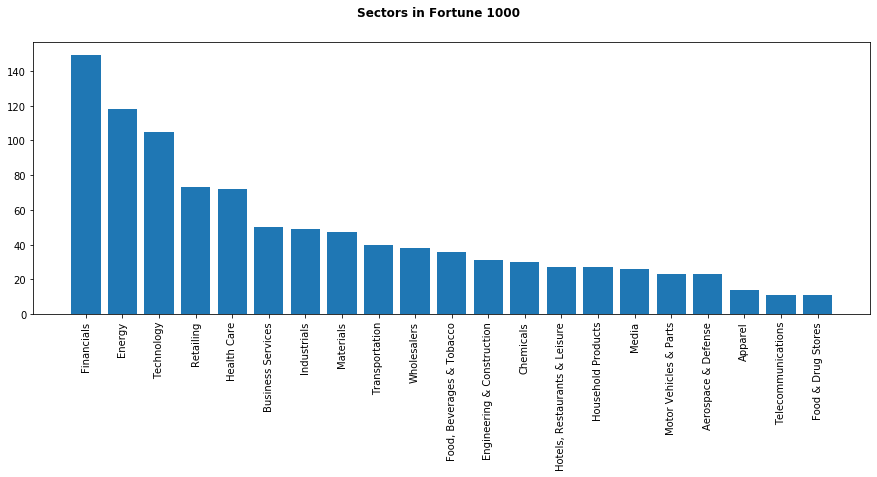

In [47]:
# Breakdown of sector
p = df.groupby('sector').count().loc[:,'url'].reset_index().sort_values(by='url', ascending=False)
fig, ax = plt.subplots(figsize=[15,5]);
ax.bar(height=p.url, x=p.sector);
fig.suptitle('Sectors in Fortune 1000', fontweight="bold");
for label in ax.get_xticklabels():
    label.set_rotation(90);

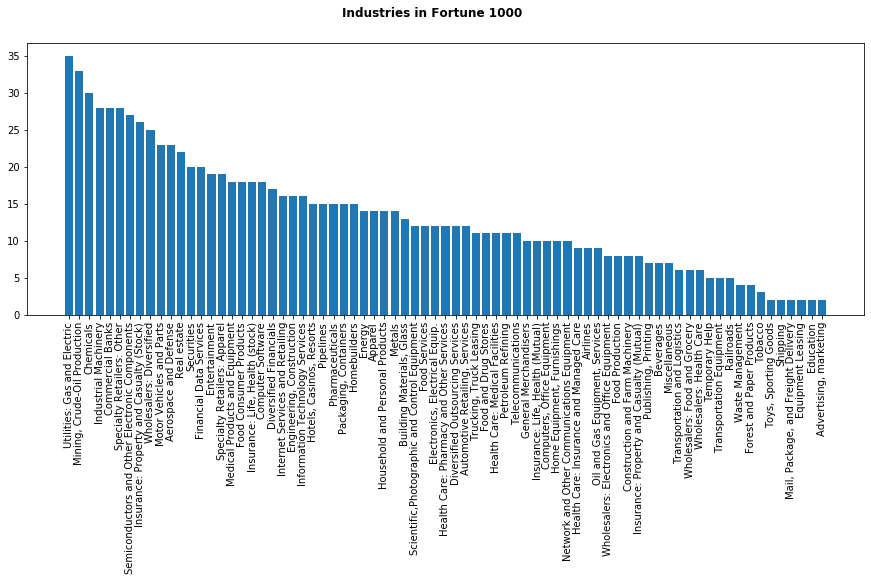

In [48]:
# Breakdown of industry
p = df.groupby('industry').count().loc[:,'url'].reset_index().sort_values(by='url', ascending=False)
fig, ax = plt.subplots(figsize=[15,5]);
ax.bar(height=p.url, x=p.industry);
fig.suptitle('Industries in Fortune 1000', fontweight="bold");
for label in ax.get_xticklabels():
    label.set_rotation(90);

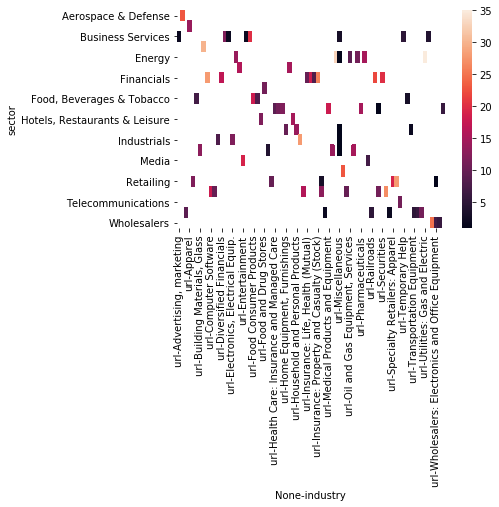

In [50]:
# Do sectors and industries have overlap?
p = df.groupby(['sector', 'industry']).count().loc[:,'url'].reset_index().sort_values(by='url', ascending=False)
p = p.pivot(index='sector', columns='industry')
sns.heatmap(p)

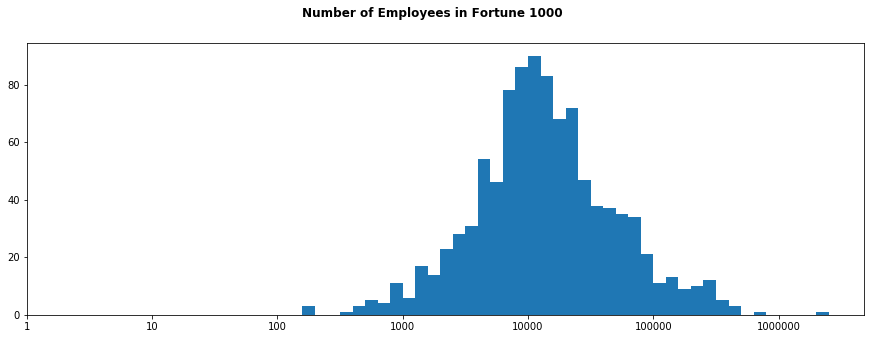

In [148]:
# Number employees
fig, ax = plt.subplots(figsize=[15,5]);
log_data = np.log10(df.employees)
log_bin_edges = np.arange(0.8, log_data.max()+0.1, 0.1)
ax.hist(log_data, bins = log_bin_edges)
plt.xticks(np.arange(7), [10**i for i in np.arange(7)]);
fig.suptitle('Number of Employees in Fortune 1000', fontweight="bold");